In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load dataset
df = pd.read_csv("quikr_car.csv")


In [5]:
# View the first few rows
df.head()


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [7]:
# View the last few rows
df.tail()


,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [9]:
# Load dataset
df = pd.read_csv("quikr_car.csv")

# Data Cleaning
df.dropna(subset=['Price'], inplace=True)
df = df[~df['Price'].str.contains('Ask For Price', na=False)]
df['Price'] = df['Price'].str.replace(',', '').str.extract(r'(\d+)', expand=False).astype(float)

df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.extract(r'(\d+)', expand=False)
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')
df = df.dropna(subset=['kms_driven'])

df = df[df['fuel_type'].notnull()]
df = df[df['year'].apply(lambda x: str(x).isdigit())]
df['year'] = df['year'].astype(int)

# Handling categorical variables
df['name'] = df['name'].str.split().str.slice(0,3).str.join(' ')
df['company'] = df['company'].str.upper().str.strip()

le_fuel = LabelEncoder()
df['fuel_type'] = le_fuel.fit_transform(df['fuel_type'])

# Feature Selection
X = df[['name', 'company', 'year', 'kms_driven', 'fuel_type']]
X = pd.get_dummies(X, drop_first=True)
y = df['Price']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Model Training with RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
# Prediction & Evaluation
y_pred = rf.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


R2 Score: 0.18
RMSE: 677203.80


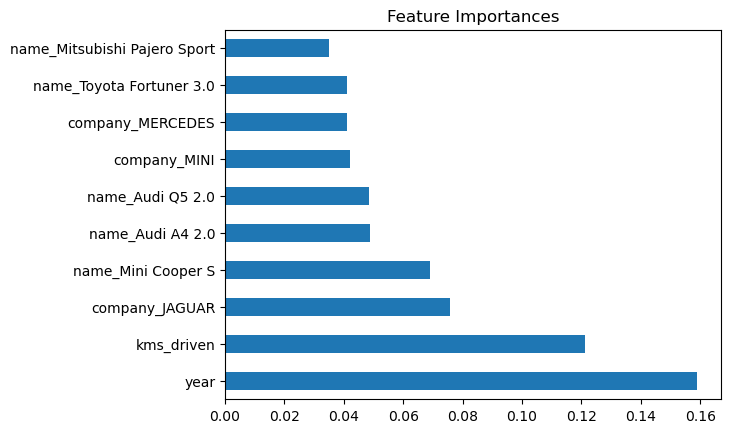

In [15]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importances")
plt.show()


In [17]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
df = pd.read_csv('quikr_car.csv')

# Basic cleaning
df = df.dropna(subset=['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'])
df['name_cleaned'] = df['name'].str.lower().str.strip()

# Function to search car by name with tabulated output
def search_car_by_name(car_name):
    query = car_name.lower().strip()
    results = df[df['name_cleaned'].str.contains(query, na=False)]

    if results.empty:
        print(f"\033[91m No records found for car name: {car_name}\033[0m")
    else:
        display_data = results[['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type']]
        print(f"\033[92mFound {len(display_data)} record(s) for '{car_name}':\033[0m\n")
        print(tabulate(display_data, headers="keys", tablefmt="fancy_grid", showindex=False))

# Interactive prompt
if __name__ == "__main__":
    while True:
        user_input = input("\n Enter car name to search (or type 'exit' to quit): ")
        if user_input.lower() == 'exit':
            print("\n\033[94mThanks for exploring my creativity! Goodbye Friends!\033[0m")
            break
        search_car_by_name(user_input)
        


 Enter car name to search (or type 'exit' to quit):  Honda City 1.5 V MT


Found 3 record(s) for 'Honda City 1.5 V MT':

╒═══════════════════════════════╤═══════════╤════════╤══════════╤══════════════╤═════════════╕
│ name                          │ company   │   year │ Price    │ kms_driven   │ fuel_type   │
╞═══════════════════════════════╪═══════════╪════════╪══════════╪══════════════╪═════════════╡
│ Honda City 1.5 V MT           │ Honda     │   2010 │ 2,85,000 │ 35,000 kms   │ Petrol      │
├───────────────────────────────┼───────────┼────────┼──────────┼──────────────┼─────────────┤
│ Honda City 1.5 V MT           │ Honda     │   2014 │ 5,49,000 │ 39,000 kms   │ Petrol      │
├───────────────────────────────┼───────────┼────────┼──────────┼──────────────┼─────────────┤
│ Honda City 1.5 V MT Exclusive │ Honda     │   2010 │ 2,40,000 │ 4,00,000 kms │ Petrol      │
╘═══════════════════════════════╧═══════════╧════════╧══════════╧══════════════╧═════════════╛



 Enter car name to search (or type 'exit' to quit):  Maruti Suzuki Alto 800 Vxi


Found 4 record(s) for 'Maruti Suzuki Alto 800 Vxi':

╒════════════════════════════╤═══════════╤════════╤═══════════════╤══════════════╤═════════════╕
│ name                       │ company   │   year │ Price         │ kms_driven   │ fuel_type   │
╞════════════════════════════╪═══════════╪════════╪═══════════════╪══════════════╪═════════════╡
│ Maruti Suzuki Alto 800 Vxi │ Maruti    │   2018 │ Ask For Price │ 22,000 kms   │ Petrol      │
├────────────────────────────┼───────────┼────────┼───────────────┼──────────────┼─────────────┤
│ Maruti Suzuki Alto 800 Vxi │ Maruti    │   2015 │ 75,000        │ 39,000 kms   │ Petrol      │
├────────────────────────────┼───────────┼────────┼───────────────┼──────────────┼─────────────┤
│ Maruti Suzuki Alto 800 Vxi │ Maruti    │   2015 │ 2,20,000      │ 38,000 kms   │ Petrol      │
├────────────────────────────┼───────────┼────────┼───────────────┼──────────────┼─────────────┤
│ Maruti Suzuki Alto 800 Vxi │ Maruti    │   2015 │ 2,30,000      │ 5,000 


 Enter car name to search (or type 'exit' to quit):  exit



Thanks for exploring my creativity! Goodbye Friends!


In [19]:
# Grouped by Fuel Type

import pandas as pd
from tabulate import tabulate

# Load dataset and clean
df = pd.read_csv('quikr_car.csv')
df = df.dropna(subset=['name', 'fuel_type', 'Price', 'kms_driven', 'year'])
df['name_cleaned'] = df['name'].str.lower().str.strip()

def search_by_name_and_group_fuel_styled(car_name):
    query = car_name.lower().strip()
    matched = df[df['name_cleaned'].str.contains(query, na=False)]

    if matched.empty:
        print(f"\033[91m No records found for car name: {car_name}\033[0m")
        return

    fuel_groups = matched.groupby('fuel_type')

    for fuel, group in fuel_groups:
        print(f"\n\033[94m Fuel Type: {fuel.upper()}\033[0m\n")
        styled_table = tabulate(
            group[['name', 'company', 'year', 'Price', 'kms_driven']],
            headers="keys",
            tablefmt="fancy_grid",
            showindex=False
        )
        print(styled_table)

# Example CLI wrapper
if __name__ == "__main__":
    while True:
        user_input = input("\n Enter car name (or type 'exit' to quit): ")
        if user_input.lower() == 'exit':
            print("\n\033[92mThanks for visiting! Your family is Eagrrly waiting for you at Home! Drive safe\033[0m")
            break
        search_by_name_and_group_fuel_styled(user_input)



 Enter car name (or type 'exit' to quit):  Honda City 1.5 V MT



 Fuel Type: PETROL

╒═══════════════════════════════╤═══════════╤════════╤══════════╤══════════════╕
│ name                          │ company   │   year │ Price    │ kms_driven   │
╞═══════════════════════════════╪═══════════╪════════╪══════════╪══════════════╡
│ Honda City 1.5 V MT           │ Honda     │   2010 │ 2,85,000 │ 35,000 kms   │
├───────────────────────────────┼───────────┼────────┼──────────┼──────────────┤
│ Honda City 1.5 V MT           │ Honda     │   2014 │ 5,49,000 │ 39,000 kms   │
├───────────────────────────────┼───────────┼────────┼──────────┼──────────────┤
│ Honda City 1.5 V MT Exclusive │ Honda     │   2010 │ 2,40,000 │ 4,00,000 kms │
╘═══════════════════════════════╧═══════════╧════════╧══════════╧══════════════╛



 Enter car name (or type 'exit' to quit):  Hyundai i20 Sportz 1.4 CRDI



 Fuel Type: DIESEL

╒═════════════════════════════╤═══════════╤════════╤══════════╤══════════════╕
│ name                        │ company   │   year │ Price    │ kms_driven   │
╞═════════════════════════════╪═══════════╪════════╪══════════╪══════════════╡
│ Hyundai i20 Sportz 1.4 CRDI │ Hyundai   │   2011 │ 3,50,000 │ 33,333 kms   │
├─────────────────────────────┼───────────┼────────┼──────────┼──────────────┤
│ Hyundai i20 Sportz 1.4 CRDI │ Hyundai   │   2014 │ 3,70,000 │ 60,000 kms   │
╘═════════════════════════════╧═══════════╧════════╧══════════╧══════════════╛



 Enter car name (or type 'exit' to quit):  exit



Thanks for visiting! Your family is Eagrrly waiting for you at Home! Drive safe


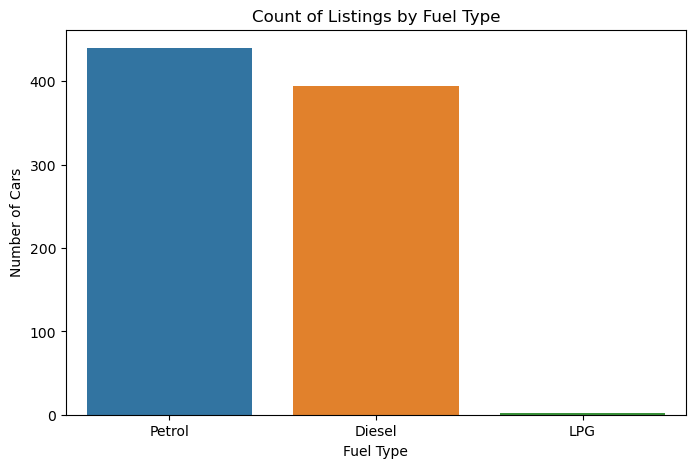

In [21]:
# Fuel Type Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='fuel_type', order=df['fuel_type'].value_counts().index)
plt.title('Count of Listings by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.show()


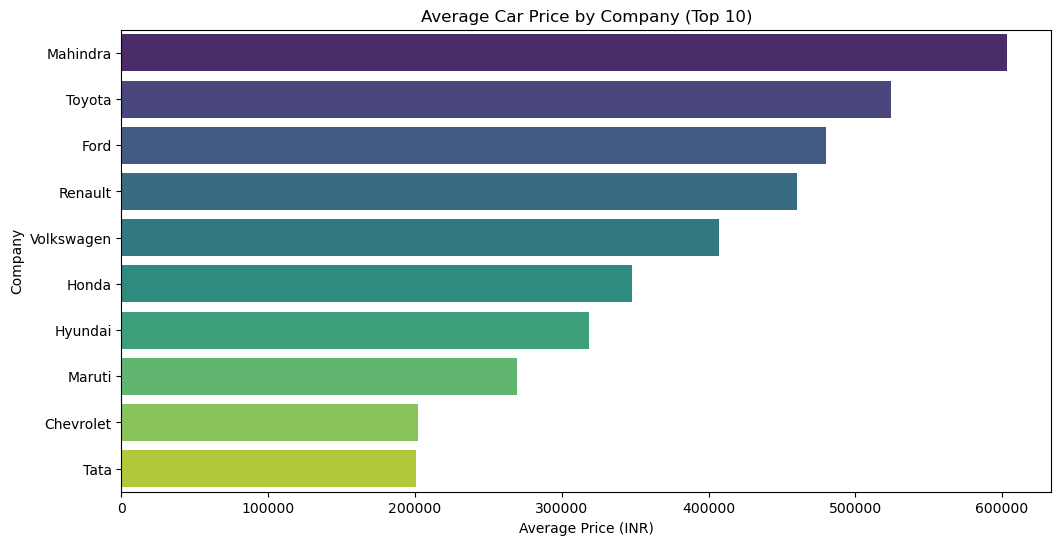

In [23]:
# Average Price by Company

# Remove commas and currency symbols, then convert to numeric
df['Price'] = df['Price'].replace('[₹,]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # convert to float, set invalids to NaN

plt.figure(figsize=(12,6))
top_companies = df['company'].value_counts().nlargest(10).index
avg_prices = df[df['company'].isin(top_companies)].groupby('company')['Price'].mean().sort_values(ascending=False)

sns.barplot(x=avg_prices.values, y=avg_prices.index, palette='viridis')
plt.title('Average Car Price by Company (Top 10)')
plt.xlabel('Average Price (INR)')
plt.ylabel('Company')
plt.show()


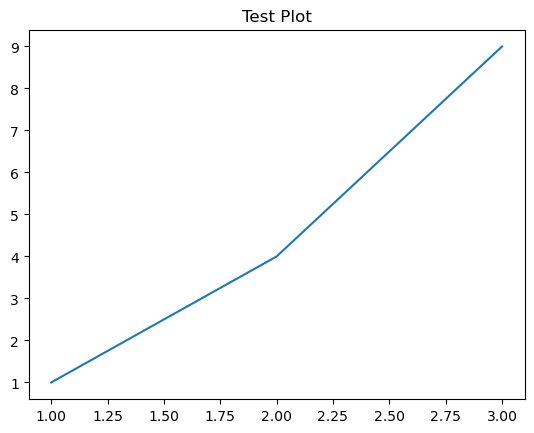

In [25]:
# Test plot

import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [1, 4, 9])
plt.title("Test Plot")
plt.show()


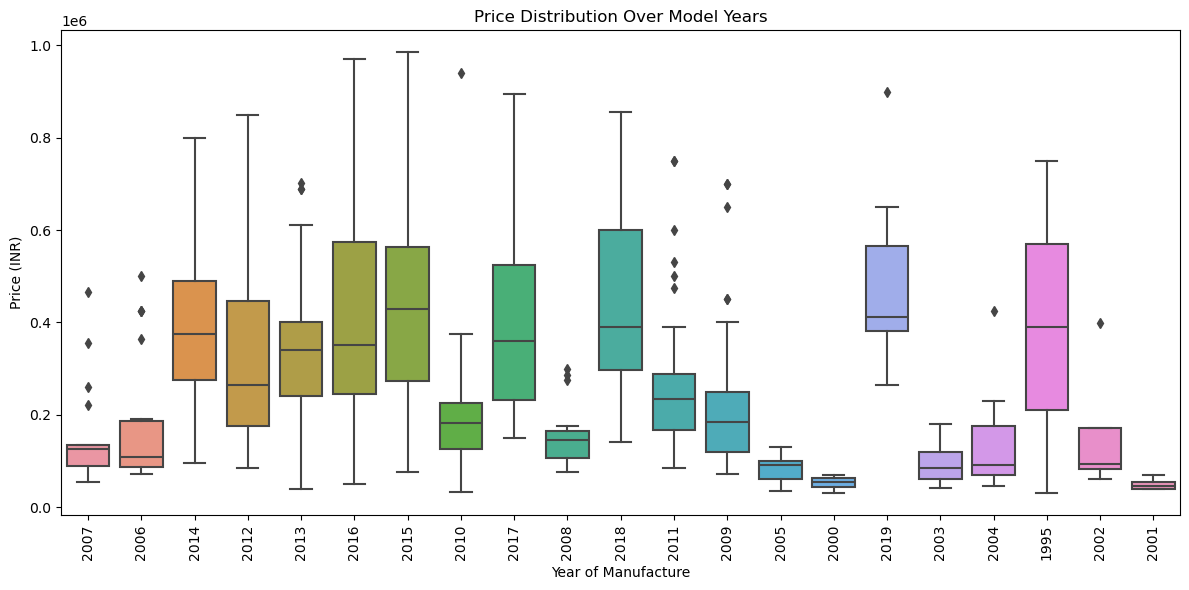

In [27]:
# Price vs. Year

plt.figure(figsize=(12,6))
sns.boxplot(x='year', y='Price', data=df[df['Price'] < 10_00_000])
plt.xticks(rotation=90)
plt.title('Price Distribution Over Model Years')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (INR)')
plt.tight_layout()  # ensures labels aren’t cut off
plt.show()


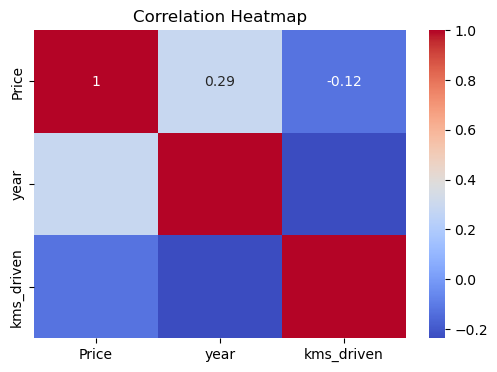

In [29]:
# Heatmap of Correlations

# Remove commas and 'kms' or any non-digit characters, then convert to numeric
df['kms_driven'] = df['kms_driven'].str.replace('[^0-9]', '', regex=True)
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')

plt.figure(figsize=(6,4))
corr = df[['Price', 'year', 'kms_driven']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


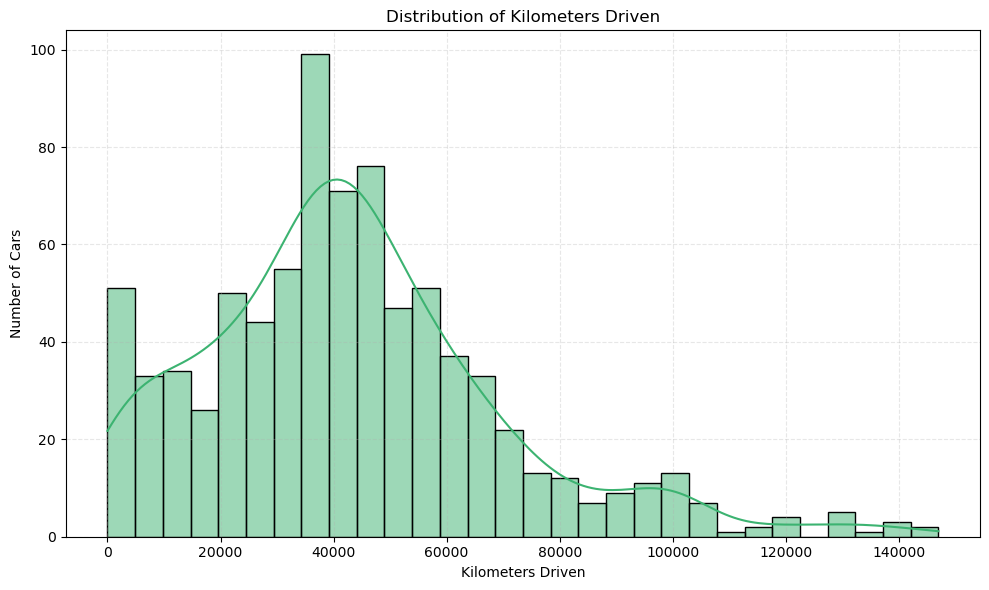

In [31]:
# Kilometers Driven 

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df[df['kms_driven'] < 150000],  # filter extreme outliers
    x='kms_driven',
    bins=30,
    kde=True,
    color='mediumseagreen'
)

plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Number of Cars')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
